In [48]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [73]:
df = pd.read_csv("../data/adult.csv")
df.head(100)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,29,Local-gov,Some-college,Never-married,Handlers-cleaners,Not-in-family,White,Male,50,United-States,<=50K,37
96,96,48,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K,284
97,97,37,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,48,United-States,>50K,217
98,98,48,Private,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,40,England,<=50K,45


# Task 1
Print the count of men and women in the dataset.

In [50]:
sex = df["sex"] #It will prevent possible case mistakes
male = sex[sex == "Male"]
female = sex[sex == "Female"]
print("Male count:", male.count())
print("Female count:", female.count())

Male count: 21790
Female count: 10771


# Task 2
Find the average age of men in dataset

In [52]:
average_age_men = df.loc[df["sex"] == "Male", "age"].mean()
average_age_men

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [56]:
poland_percentage = (df["native-country"] == "Poland").mean() * 100
poland_percentage

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [62]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")

income_grouped = df.groupby("salary")["age"]

mean_high_income = income_grouped.get_group(">50K").mean()
std_high_income = income_grouped.get_group(">50K").std()

mean_low_income = income_grouped.get_group("<=50K").mean()
std_low_income = income_grouped.get_group("<=50K").std()

print("Mean and standard deviation for people earning > 50K:")
print("Mean:", mean_high_income)
print("Standard Deviation:", std_high_income)

print("\nMean and standard deviation for people earning <= 50K:")
print("Mean:", mean_low_income)
print("Standard Deviation:", std_low_income)


Mean and standard deviation for people earning > 50K:
Mean: 44.24984058155847
Standard Deviation: 10.519027719851826

Mean and standard deviation for people earning <= 50K:
Mean: 36.78373786407767
Standard Deviation: 14.02008849082488


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [69]:
high_income_no_higher_edu = df[(df["salary"] == ">50K") & ~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]

if not high_income_no_higher_edu.empty:
    print(f"Yes, there are people with > 50K salary without higher education")
else:
    print("No people with >50K salary without higher education.")

Yes, there are people with > 50K salary without higher education


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [70]:
education_stats = df.groupby("education")["age"].describe()
education_stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [71]:
df["is_married"] = df["marital-status"].str.startswith("Married")

married_salary_stats = df[(df["sex"] == "Male") & (df["is_married"] == True)]["salary"].value_counts()
non_married_salary_stats = df[(df["sex"] == "Male") & (df["is_married"] == False)]["salary"].value_counts()

if married_salary_stats[">50K"] > non_married_salary_stats[">50K"]:
    print("\nMarried men earn more.")
elif married_salary_stats[">50K"] < non_married_salary_stats[">50K"]:
    print("\nNon-married men earn more.")
else:
    print("\nBoth groups earn the same.")


Married men earn more.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [72]:
max_hours = df["hours-per-week"].max()

num_people_max_hours = (df["hours-per-week"] == max_hours).sum()
print("Maximum hours per week:", max_hours)
print("Number of people working the same amount of hours:", num_people_max_hours)

Maximum hours per week: 99
Number of people working the same amount of hours: 85


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

In [77]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Unnamed: 0,age,hours-per-week,salary K$
Unnamed: 0,1.000000,0.001286,0.000607,-0.001666
age,0.001286,1.000000,0.068756,0.201774
hours-per-week,0.000607,0.068756,1.000000,0.196916
salary K$,-0.001666,0.201774,0.196916,1.000000


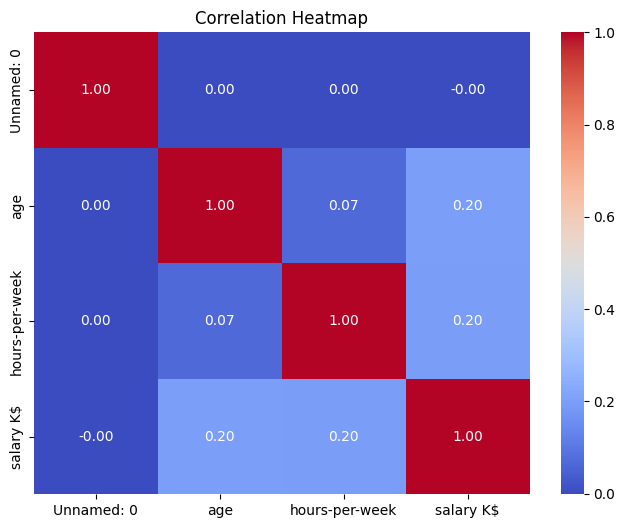

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()